5　 資源と貿易：ヘクシャー＝オリーン・モデル

　資源、すなわち資本と労働の相対的な豊富さが、国・地域の貿易に影響するとエリ・ヘクシャーとベルティル・オリーンは提唱しています。本例では、各国・地域が利用可能な生産要素の比率の違いが、二国間貿易にどの程度の影響をもたらしているのか、この要素比率理論を実装します。

　まず、pandas、numpy、matplotlib、statmodels、の4つのライブラリーを読み込みます。前章では、回帰分析を行うためのライブラリにはsklearnとstatmodelsとが選択肢としてありますが、本章ではstatmodelsを用います。sklearnとstatmodelsはそれぞれ一長一短があります。どのような場合に、どちらを用いればよいのかは、例えば拙著『Pythonで学ぶファイナンス論×データサイエンス』朝倉書店、55-56頁を参照してください。

In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

　続いて、データセット（CSVファイル）を読み込みます。読み込んだデータをpandasデータフレームに収納します。このときのデータフレーム名は任意で構いません。左列の日時をインデックス化し、エンコードは"Shift-JIS"を選択しておきます。

In [ ]:
#[2]データの読み込み
import pandas as pd
from google.colab import files
uploaded = files.upload()
japan = pd.read_csv(('JPN_US_CN.csv'),encoding="Shift-JIS",index_col=0).dropna()

　データ読込みが間違いなく行われているかを、.head()により確認します。ここでの確認により、後段のセルで新変数（新Column）作成時にどの変数とどの変数をを用いればよいかを視認することが可能となります。

In [ ]:
#[3]データの確認
japan.head()

　貿易モデルの被説明変数、説明変数を算出し、新たな変数として、データフレームに追加します。ここでは、USドル建て輸出額（輸入額）を対数変換し(lnEXus)、二国間の相対価格比（Pjp_Pus)、累積固定資本相対比（Cjp_Cus）を算出、相手先国実質所得を対数変換（lnYus）します。

In [4]:
#[4]変数の生成
japan['lnEXus']=np.log(japan['export_us'])
japan['Pjp_Pus']=japan['P_jp']/japan['P_us']
japan['Cjp_Cus']=japan['C_jp']/japan['C_us']
japan['lnYus']=np.log(japan['Y_us'])

　算出された新変数を含む全変数の記述統計を算出します。「第5章資源と貿易」では、二国間の「相対価格比Pc/Pf」と「労働レンタル比率L/W」が正の関係にあることを説明しています。それゆえ、本例では、二国間の相対価格比(Pjp/Pus)が輸出（輸入）にプラスの影響を与えていれば、労働集約型産業の生産性上昇（低下）が輸出増進に貢献していることが支持されます。



　他方、二国間の累積固定資本比(Cjp/Cuj)は、両国でどの程度の生産能力増強が企業により行われてきたかを示す変数です。これが輸出（輸入）にプラスの影響をもたらしていれば、労働と資本のうち、資本の相対的な増加（減少）が輸出（輸入）を促しているとわかります。


　最終需要の代理変数(Yus)は、輸出入関数では、概ね統計的に有意に影響をもたらします。労働と資本の要素投入という企業側の活動よりも、製品サービスの購入者である家計・企業等の需要サイドの影響が大きいことがその理由です。米国（Yus)の替わりに中国（Ycn)で検証してみると、米中通商政策が東アジア諸国とどのようなリンケージをもたらしてきたかを、確認することができます。

In [ ]:
#[5]記述統計量の算出
japan.describe()

　実証前に貿易データと、各変数の二カ国間の相対価格比、累積固定資本相対比、最終需要データを、それぞれ散布図を作成し、可視化します。

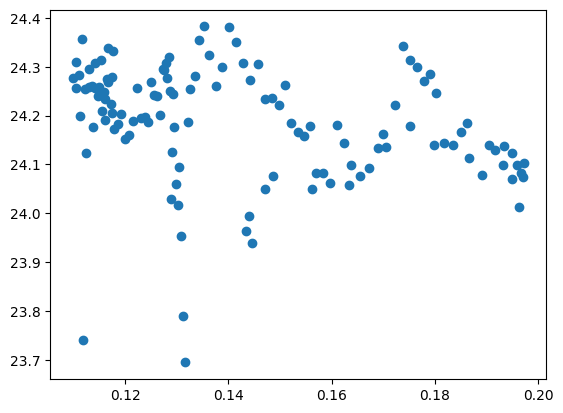

In [5]:
#[5]可視化
#plt.scatter(japan.lnYus,japan.lnEXus)
#plt.scatter(japan.Pjp_Pus,japan.lnEXus)
plt.scatter(japan.Cjp_Cus,japan.lnEXus)

　最後に実証モデルを最小二乗法により推計します。被説明変数は日本の米国への輸出額（lnEXus）、説明変数はそれぞれ日米価格相対比（Pjp_Pus）、日米累積固定資本相対比（Cjp_Cus)、米国の実質最終需要(lnYus)です。

In [6]:
#[6]H=Oモデルの推計
X=japan[['Pjp_Pus','Cjp_Cus','lnYus']]
y=japan['lnEXus']
X=sm.add_constant(X)
Model=sm.OLS(y,X).fit()
print(Model.summary().tables[1])
print('AdjR2: %.4f'% Model.rsquared_adj)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7249      7.215     -0.793      0.429     -20.011       8.561
Pjp_Pus        0.5749      0.251      2.286      0.024       0.077       1.073
Cjp_Cus        1.2976      0.737      1.761      0.081      -0.161       2.756
lnYus          1.0022      0.240      4.174      0.000       0.527       1.478
AdjR2: 0.2740
